In [4]:
import torch
import matplotlib.pyplot as plt
# local
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
import clamiter as ci
from transformation import RealNVP, train_prior, get_cov
from utils.plotting import *
import datasets.simulations as sim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exotic Shapes


##  IE Space

<Axes: title={'center': 'feat 0 vs feat 1'}>

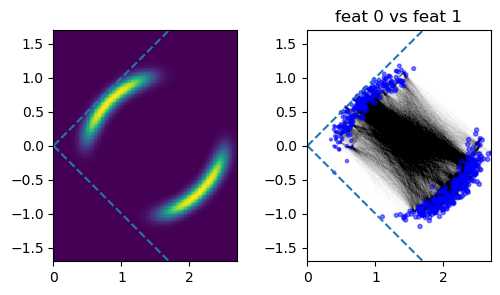

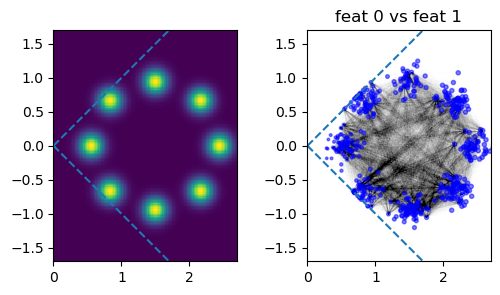

In [16]:

num_samples = 500

#* two moons
graph_two_moons, dist_two_moons = sim.sample_normflows_dist(num_samples, 'TwoMoons', lorenz=True)

# #* circular gaussian mixture
graph_circ_gaus, dist_circ_gaus = sim.sample_normflows_dist(num_samples, 'Circ', lorenz=True)



_, axes_moons = plt.subplots(1, 2, figsize=(6, 3))
plot_normflows_dist(dist_two_moons, lorenz=True, x_fig_lim=[0, 2.7], y_fig_lim=[-1.7,1.7], ax=axes_moons[0])

plot_2dgraph(graph_two_moons, 
             lorenz_fig_lims=True, 
             ax=axes_moons[1],
             draw_edges=True)

# plot_normflows_dist(dist_two_moons,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_moons[0])

_, axes_circ = plt.subplots(1, 2, figsize=(6, 3))

plot_normflows_dist(dist_circ_gaus,lorenz=True, x_fig_lim=[0, 2.7],y_fig_lim=[-1.7,1.7], ax=axes_circ[0])

plot_2dgraph(graph_circ_gaus, 
             lorenz_fig_lims=True, 
             ax=axes_circ[1],
             draw_edges=True)

# plot_normflows_dist(dist_circ_gaus,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_circ[0])


# _, axes_chubs = plt.subplots(1, 2, figsize=(6, 3))
# plot_2dgraph(graph_two_chubs, lorenz_fig_lims=False, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[0])
# plot_normflows_dist(dist_two_chubs,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[0])
# plot_normflows_dist(dist_two_chubs,shift=-0.5, scale=5, device=device, x_fig_lim=[-0.1, 1.1], ax=axes_chubs[1])




### IECLAM



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-22 19:37:10 starting optimization of iegam on TwoMoons on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 0.05,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:372:::  
fit wrapper fit_feats, plotting state at iter 9999


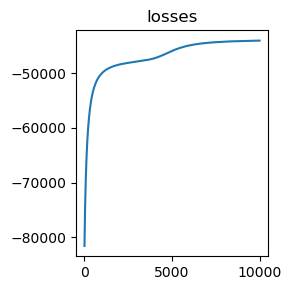

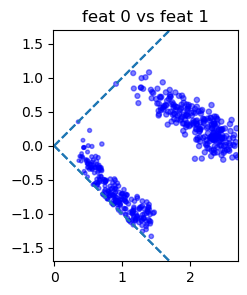



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:418:::  


FINISHED train 
 last accuracies:
test
key='losses': -44006.35546875


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:432:::  





In [19]:
config_triplets = [ #* example how to change configs
                    ['feat_opt', 'n_iter', 200],
#                     ['feat_opt', 'lr', 0.00005],
#                     ['prior_opt', 'n_iter', 1500],
#                     ['prior_opt', 'lr', 0.0000005],
#                     ['prior_opt', 'noise_amp', 0.25],
#                     ['back_forth','n_back_forth', 50],
#                     ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]

trainer_ieclam_twomoons = Trainer(
                model_name='ieclam',
                task=None,
                device=device,
                dataset=graph_two_moons.clone()
)
# i want to optimize the trainer
losses_moons_ieclam, test_acc_moons_ieclam, val_acc_moons_ieclam = trainer_ieclam_twomoons.train(
    init_feats=True,
    init_type='small_gaus',
    plot_every=-1,
    verbose=False
)

del trainer_ieclam_twomoons.data

### PieClam

#### Two Moons



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:302:::  
 2024-09-03 12:41:34 starting optimization of piegam on TwoMoons on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.0,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 0.0001,
        "n_iter": 2000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 2000,
        "lr": 5e-05,
        "noise_amp": 0.25,
        "weight_decay": 0.01,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 5,
        "scheduler_step_size": 100,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:546:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home

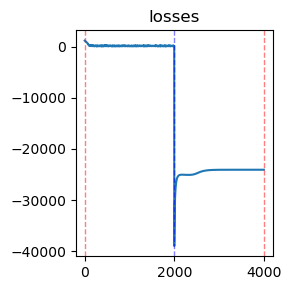

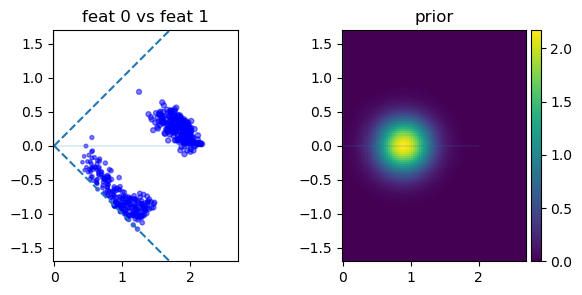



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 2/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:662:::  
fit, plotting state at iter 2.
dataset: TwoMoons, ,model: piegam


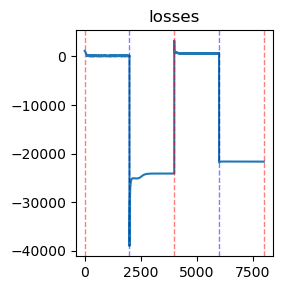

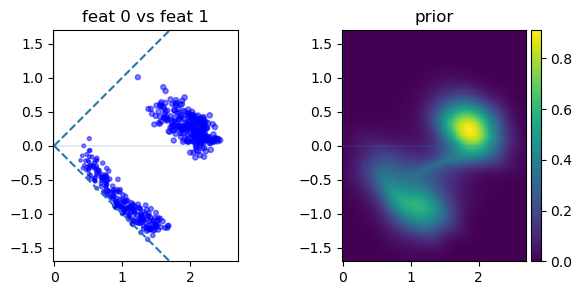



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:604:::  
back and forth 3/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:410:::  


FINISHED train model on params 
 last accuracies:


UnboundLocalError: cannot access local variable 'accuracies_test' where it is not associated with a value

In [11]:
config_triplets = [ #* example how to change configs
                    # ['feat_opt', 'n_iter', 200],
                    ['feat_opt', 'lr', 0.0001],
                    # ['prior_opt', 'n_iter', 150],
                    # ['prior_opt', 'lr', 0.00005],
                    # ['prior_opt', 'noise_amp', 0.25],
                    # ['back_forth','n_back_forth', 20],
                    # ['back_forth', 'first_func_in_fit', 'fit_feats']
                ]


trainer_pieclam_twomoons = Trainer(
                model_name='pieclam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_two_moons.clone()
)
# i want to optimize the trainer
losses_pieclam_moons, test_acc_moons, val_acc_moons = trainer_pieclam_twomoons.train(
    plot_every=1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False,
    draw_nodes_on_prior=False
)

del trainer_pieclam_twomoons.data
del trainer_pieclam_twomoons.clamiter.prior


#### Circle



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-22 20:18:06 starting optimization of iegam on Circ on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 0.05,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:372:::  
fit wrapper fit_feats, plotting state at iter 9999


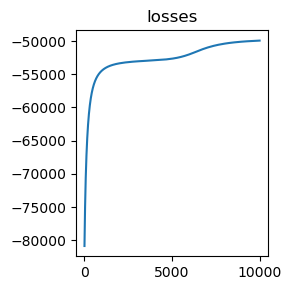

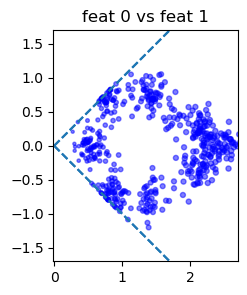



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:418:::  


FINISHED train 
 last accuracies:
test
key='losses': -49935.77734375


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:432:::  





In [ ]:
config_triplets = [
                    # ['feat_opt', 'n_iter', 2000],
#                     ['feat_opt', 'lr', 0.00005],
#                     ['prior_opt', 'n_iter', 1500],
#                     ['prior_opt', 'lr', 0.0000005],
#                     ['prior_opt', 'noise_amp', 0.25],
#                     ['back_forth','n_back_forth', 50],
#                     ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]



trainer_ieclam_circ = Trainer(
                model_name='ieclam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_circ_gaus.clone()
)

losses_ieclam_circ, acc_test_ieclam_circ, acc_val_ieclam_circ = trainer_ieclam_circ.train(
    task_params={'d' : 0.2},
    plot_every=-1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False,
    draw_nodes_on_prior=False
)

del trainer_ieclam_circ.data



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-22 20:37:51 starting optimization of piegam on Circ on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.0,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-05,
        "n_iter": 2000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 2000,
        "lr": 5e-05,
        "noise_amp": 0.25,
        "weight_decay": 0.01,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 5,
        "scheduler_step_size": 100,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:544:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user

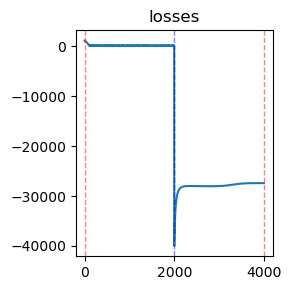

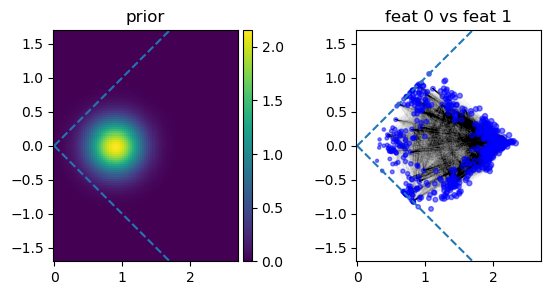



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:603:::  
back and forth 2/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:661:::  
fit, plotting state at iter 2.
dataset: Circ, ,model: piegam


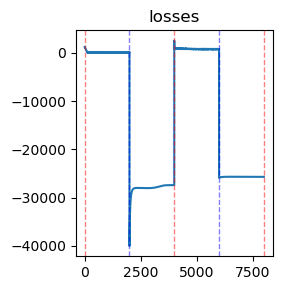

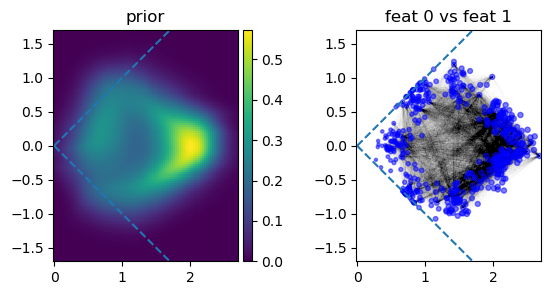



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:603:::  
back and forth 3/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:661:::  
fit, plotting state at iter 3.
dataset: Circ, ,model: piegam


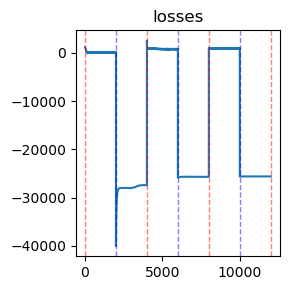

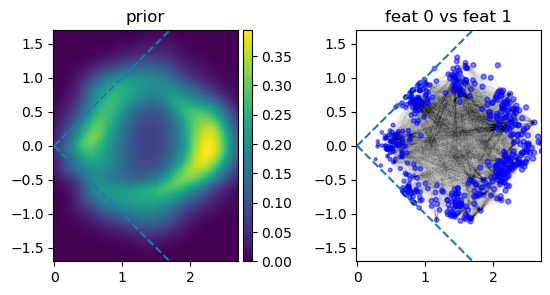



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:603:::  
back and forth 4/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:661:::  
fit, plotting state at iter 4.
dataset: Circ, ,model: piegam


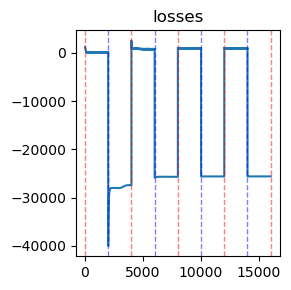

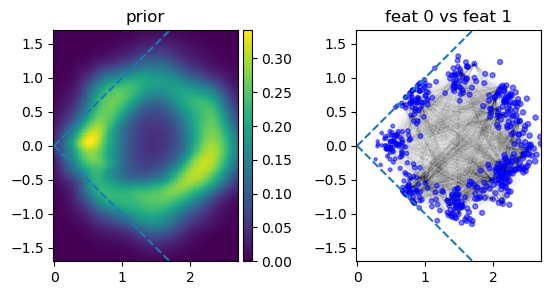



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:603:::  
back and forth 5/5


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:661:::  
fit, plotting state at iter 5.
dataset: Circ, ,model: piegam


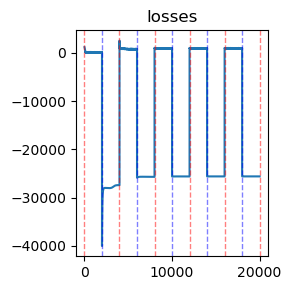

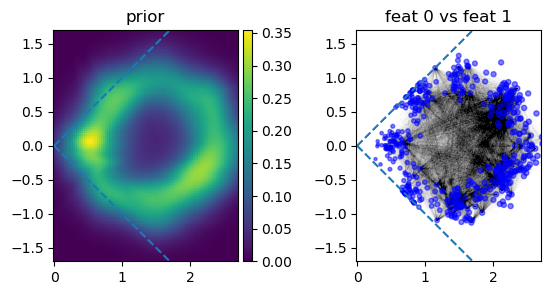



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:667:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:418:::  


FINISHED train 
 last accuracies:
test
key='losses': -25594.509765625


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:432:::  





In [ ]:
# CIRC
config_triplets = [
                    # ['feat_opt', 'n_iter', 200],
                    # ['feat_opt', 'lr', 0.00005],
                    # ['prior_opt', 'n_iter', 150],
                    # ['prior_opt', 'lr', 0.0000005],
                    # ['prior_opt', 'noise_amp', 0.1],
                    # ['back_forth','n_back_forth', 1],
                    # ['back_forth', 'first_func_in_fit', 'feat_opt']
                ]



trainer_pieclam_circ = Trainer(
                model_name='pieclam',
                task=None,
                device=device,
                config_triplets_to_change=config_triplets,
                dataset=graph_circ_gaus.clone()
)

losses_pieclam_circ, acc_test_pieclam_circ, acc_val_pieclam_circ = trainer_pieclam_circ.train(
    plot_every=1,
    init_feats=True,
    init_type='small_gaus',
    verbose=False,
    verbose_in_funcs=False,
    draw_nodes_on_prior=False,
    draw_edges=True
)

del trainer_pieclam_circ.data
del trainer_pieclam_circ.clamiter.prior


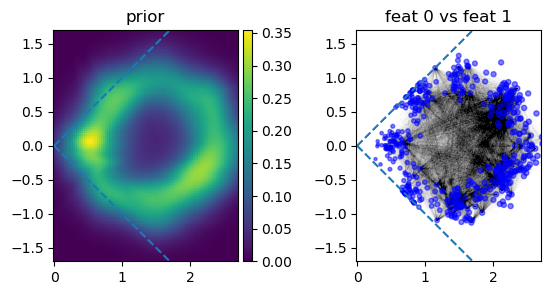

In [44]:
# THIS BLOCK WILL NOT WORK IF YOU DELETE THE DATA AND MODEL IN THE PREVIOUS BLOCK

from utils.plotting import plot_graph_2_feats

prior = trainer_pieclam_circ.clamiter.prior
lorenz = trainer_pieclam_circ.clamiter.lorenz
draw_nodes_on_prior = False
graph_cpu = graph_circ_gaus.cpu()
community_affiliation_cpu = None


draw_edges = True
plot_graph_2_feats(trainer_pieclam_circ.data, community_affiliation_cpu, prior, lorenz, draw_nodes_on_prior, draw_edges=draw_edges)